In [25]:
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

## Loading the dataset
Loading the pima india diabetes dataset using numpy

In [16]:
data = genfromtxt('pima-indians-diabetes.csv', delimiter=',')
cols = data.shape[1]

# Defining X and y
X = data[:,:cols-1]
y = data[:,cols-1]

# Train and test split
X_train,X_test,y_train,y_test = train_test_split(
                                    X, y, test_size=0.3,
                                    random_state=23)

To predict probability we will use output of linear model and logistic function:

$$ a(x; w) = \langle w, x \rangle $$
$$ P( y=1 \; \big| \; x, \, w) = \dfrac{1}{1 + \exp(- \langle w, x \rangle)} = \sigma(\langle w, x \rangle)$$

In [20]:
def prob(X,w):
    """
    Given input features and weights
    return predicted probabilities of y==1 given x, P(y=1|x)
    
    :param X: feature matrix X of shape [n_samples,6] (expanded)
    :param w: weight vector w of shape [6] for each of the expanded features
    :returns: an array of predicted probabilities in [0,1] interval.
    """
    
    z = np.dot(X,w)
    s = 1./(1+np.exp(-z))
    
    return np.array(s)

Calculating the loss for the l samples

Loss for one sample: $$ l(x_i, y_i, w) = - \left[ {y_i \cdot log P(y_i = 1 \, | \, x_i,w) + (1-y_i) \cdot log (1-P(y_i = 1\, | \, x_i,w))}\right] $$

Loss for many samples: $$ L(X, \vec{y}, w) =  {1 \over \ell} \sum_{i=1}^\ell l(x_i, y_i, w) $$

In [114]:
def compute_loss(X,w,y):
    
    y_hat = prob(X,w)
    l = X.shape[0]
    eps = 1e-5
    
    #cross_entropy = np.dot(y, np.log(y_hat))+np.dot((1-y), np.log(1-y_hat))
    cross_entropy = y*np.log(y_hat+eps) + (1-y)*np.log(1-y_hat + eps)
    
    #print("Term 1:")
    #print(y*np.log(y_hat))
    #print("Term 2:")
    #print((1-y)*np.log(1-y_hat))
    #print("Cross Entropy: ")
    #print(cross_entropy)
    loss = -np.sum(cross_entropy)/float(l)
    
    return loss

Calculating the gradient

$$ \nabla_w L = {1 \over \ell} \sum_{i=1}^\ell \nabla_w l(x_i, y_i, w) $$ 

which would be given as:

$$ {\partial L \over \partial W} = {1 \over \ell} \sum_{i=1}^\ell (s_i - y_i) \cdot x_i 
$$

In [119]:
def compute_grad(X,w,y):
    
    s = prob(X,w)
    l = X.shape[0]
    
    dZ = (s - y)
    dW = np.dot(dZ, X)/float(l)
    
    return dW

Function to visualize the loss history

In [57]:
from IPython import display

def visualize(history):
    plt.plot(history)
    plt.grid()
    ymin, ymax = plt.ylim()
    plt.ylim(0., ymax)
    display.clear_output(wait=True)
    plt.show()

In [111]:
np.log(0)

/home/inf0rmed/git/ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

### Approach 1

Using Mini-batch SGD

$$ w_t = w_{t-1} - \eta {1 \over m} \sum_{i=1}^m (s_i - y_i) \cdot x_i 
$$

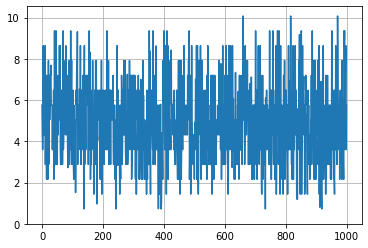

[ 5.75645773  4.3173408   3.59778233  4.3173408   8.63363385  4.3173408
  5.75645773  5.75645773  4.3173408   4.3173408   8.6346916   2.87822387
  5.8845328   5.75645773  3.59777925  2.1586654   7.19557467  3.59778233
  3.61557707  2.1586654   3.58761416  7.91513313  2.87822387  3.59778233
  7.19557467  5.03689927  5.75645773  7.19557467  7.19557467  7.68350925
  5.75645773  5.75645773  5.75645773  5.75645773  3.59778233  5.03689927
  3.59778233  4.3173408   6.4760162   2.1586654   4.31734115  9.35425007
  5.03689927  5.03689927  2.87822387  2.87607209  9.35425007  3.59778233
  7.19557467  5.75645773  2.87822388  7.19557467  4.3173408   4.3173408
  6.4760162   5.74172897  5.03667911  8.6346916   6.4760162   8.6346916
  3.59778233  2.87831291  2.87822358  6.47623958  2.87822387  2.87822387
  6.47594685  2.87822387  4.54887825  9.35425007  3.59778233  4.3173408
  6.4760162   5.03689927  4.99464183  5.75645773  7.91513313  4.3173408
  8.6346916   5.03689927  4.31734226  7.19557467  7.1955

<Figure size 432x288 with 0 Axes>

In [118]:
np.random.seed(23)
# Initialize the weights
w = np.random.rand(8,)
# Learning rate
neu = 0.1
# Number of iterations
n_iter = 1000
# Loss history
loss = np.zeros(n_iter)


for i in range(n_iter):
    ind = np.random.choice(X_train.shape[0], 16)
    _loss = compute_loss(X_train[ind,:], w, y_train[ind])
    

    if np.isnan(_loss):
        print("Weight: ")
        print(w)
        print("\nBatch")
        print(X_train[ind,:])
        print("\nY:")
        print(y_train[ind])
        print("\nProb: ")
        print(prob(X_train[ind,:], w))
        break

    loss[i] = _loss
    
    if i%10==0:
        visualize(loss)
        
    # Get the gradient
    dW = compute_grad(X_train[ind,:], w, y_train[ind])
    
    # Adjust weights
    w = w - neu*dW

visualize(loss)
plt.clf()

print(loss)
